<a href="https://colab.research.google.com/github/nischalp114/MSCS_634_ProjectDeliverable_1/blob/main/Deliverable1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load Dataset
df = pd.read_csv("stroke_data.csv")  # Make sure the file is named correctly

# Basic Dataset Info
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Check for missing values
df.isnull().sum()

# BMI has missing values - Let's inspect
df[df['bmi'].isnull()]

# Fill missing BMI values with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Sanity check for inconsistent categories
print("Gender values:", df['gender'].unique())
print("Work type values:", df['work_type'].unique())
print("Smoking status values:", df['smoking_status'].unique())



Duplicate rows: 0
Gender values: ['Male' 'Female']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


/tmp/ipython-input-5-3873151332.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


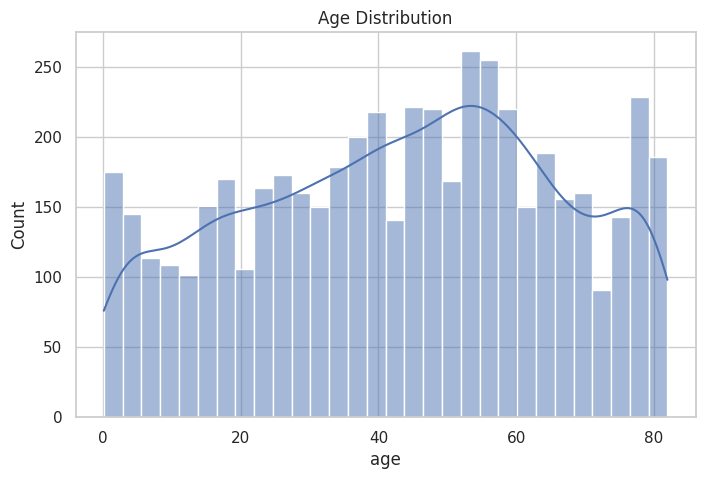

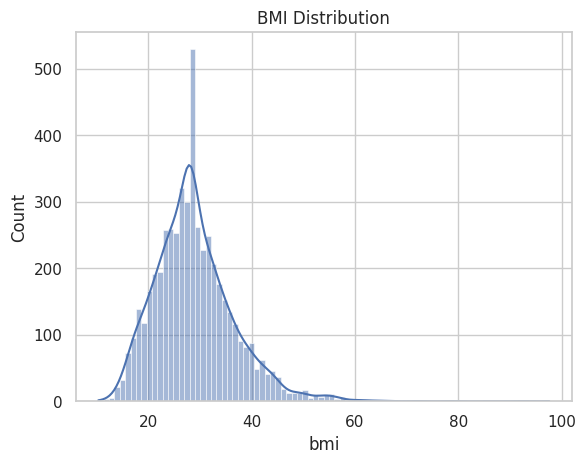

In [6]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# BMI distribution
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.show()


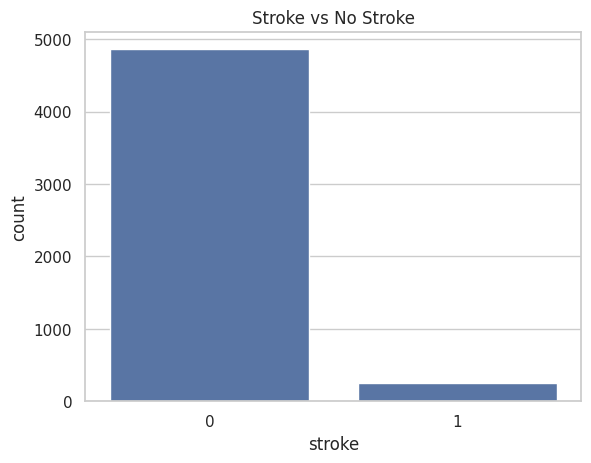

Stroke occurrence:
 stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64


In [7]:
# Target balance
sns.countplot(x='stroke', data=df)
plt.title("Stroke vs No Stroke")
plt.show()

stroke_rate = df['stroke'].value_counts(normalize=True)
print("Stroke occurrence:\n", stroke_rate)


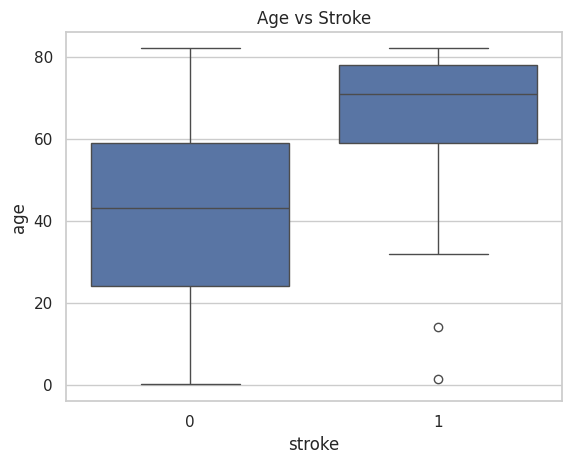

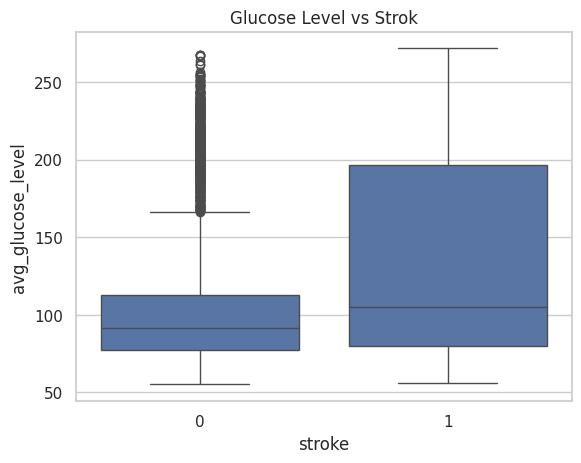

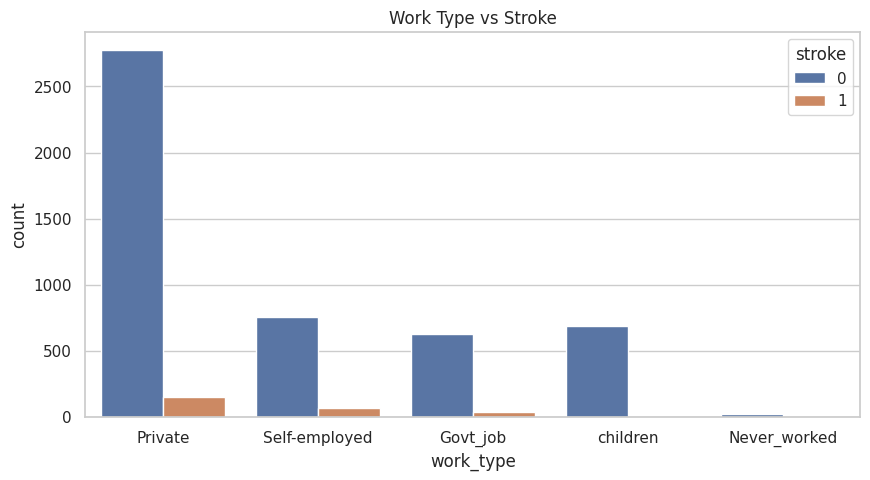

In [11]:
# Age vs Stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()

# Glucose vs Stroke
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title("Glucose Level vs Strok")
plt.show()

# Stroke by work type
plt.figure(figsize=(10,5))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title("Work Type vs Stroke")
plt.show()
